<a href="https://colab.research.google.com/github/wjdolan/DS_Portfolio/blob/main/ROC_Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ROC Curve from Scratch

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, roc_curve, RocCurveDisplay

In [5]:
# Parameters for the synthetic data
scale = 5
size = 500

In [7]:
# Generate class 1 out of a normal distribution
class1_x = np.random.normal(loc = 10, scale = scale, size = size)
class1_y = np.random.normal(loc = 1, scale = scale, size = size)

In [8]:
# Generate class 2 out of a normal distribution
class2_x = np.random.normal(loc = 1, scale = scale, size = size)
class2_y = np.random.normal(loc = 5, scale = scale, size = size)

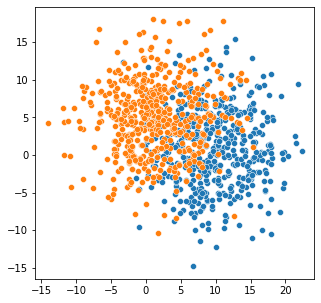

In [11]:
# Plot both to show how much they intersect
plt.figure(figsize=(5, 5))
sns.scatterplot(x = class1_x, y = class1_y)
sns.scatterplot(x = class2_x, y = class2_y);

In [12]:
df_class1 = pd.DataFrame()
df_class1['x'] = class1_x
df_class1['y'] = class1_y
df_class1['class'] = 0

In [13]:
df_class2 = pd.DataFrame()
df_class2['x'] = class2_x
df_class2['y'] = class2_y
df_class2['class'] = 1

In [14]:
df = df_class1.append(df_class2, ignore_index = True)

In [15]:
# Get the dependent and independent variables
X = df.drop(columns = ['class'])
y = df['class']

In [16]:
# Split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Create the model object
model = GaussianNB()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the classes on the test data
y_pred = model.predict(X_test)

# Predict the classes on the test data, and return the probabilities for each class
y_proba = model.predict_proba(X_test)




In [18]:
def calculate_tpr_fpr(y_real, y_pred):
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

In [24]:
def get_n_roc_coordinates(y_real, y_proba, n = 50):
    tpr_list = [0]
    fpr_list = [0]
    for i in range(n):
        threshold = i/n
        y_pred = y_proba[:, 1] > threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [20]:
def plot_roc_curve(tpr, fpr, scatter = True):
    plt.figure(figsize = (5, 5))
    if scatter:
        sns.scatterplot(x = fpr, y = tpr)
    sns.lineplot(x = fpr, y = tpr)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green')
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

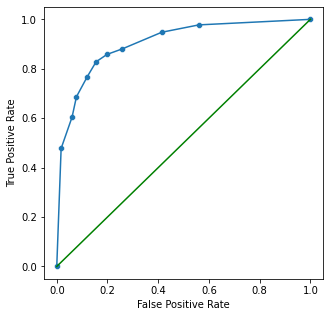

In [25]:
# Calculates 10 coordinates of the ROC Curve
tpr, fpr = get_n_roc_coordinates(y_test, y_proba, 10)

# Plots the ROC curve
plot_roc_curve(tpr, fpr)

## Plot ROC Curve using SciKit-Learn

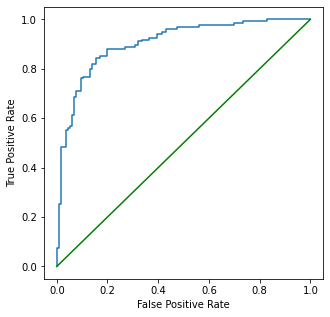

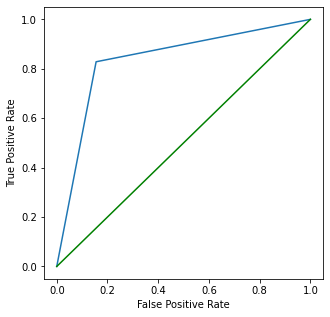

In [27]:
def plot_sklearn_roc_curve(y_real, y_pred):
    fpr, tpr, _ = roc_curve(y_real, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')

# Plots the ROC curve using the sklearn methods - Good plot
plot_sklearn_roc_curve(y_test, y_proba[:, 1])

# Plots the ROC curve using the sklearn methods - Bad plot
plot_sklearn_roc_curve(y_test, y_pred)